In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\91702\Downloads\Algerian_forest_fires_dataset_UPDATE.csv")

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
 RH              int64
 Ws              int64
Rain           float64
FFMC           float64
DMC            float64
DC              object
ISI            float64
BUI            float64
FWI             object
Classes         object
Region           int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 28.7+ KB


In [7]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754,0.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000,1.000000


In [8]:
# the dataset Number of rows and the Number of columns 
df.shape

(244, 15)

In [9]:
#renaming column names so as to remove spaces nehind
df.rename(columns={'Rain ': 'Rain', 'Classes  ': 'classes'}, inplace=True)

In [10]:
#how many coloumns are the dataframe
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'classes', 'Region'],
      dtype='object')

In [11]:
df.nunique()

day             31
month            4
year             1
Temperature     19
 RH             62
 Ws             18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            126
classes          8
Region           2
dtype: int64

In [12]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
classes        1
Region         0
dtype: int64

In [13]:
df = df.drop(['year'],axis = 1)

In [14]:
#check after droppping year feature
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


# Relationship Analysis

# hitmap 

<AxesSubplot:>

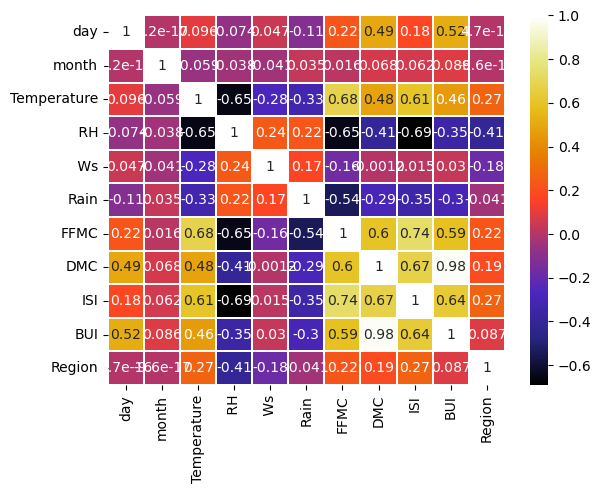

In [67]:
sns.heatmap(df.corr(),annot=True,cmap="CMRmap",linewidths=.3)

In [69]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 11 numerical features : ['day', 'month', 'Temperature', ' RH', ' Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI', 'Region']

We have 3 categorical features : ['DC', 'FWI', 'classes']


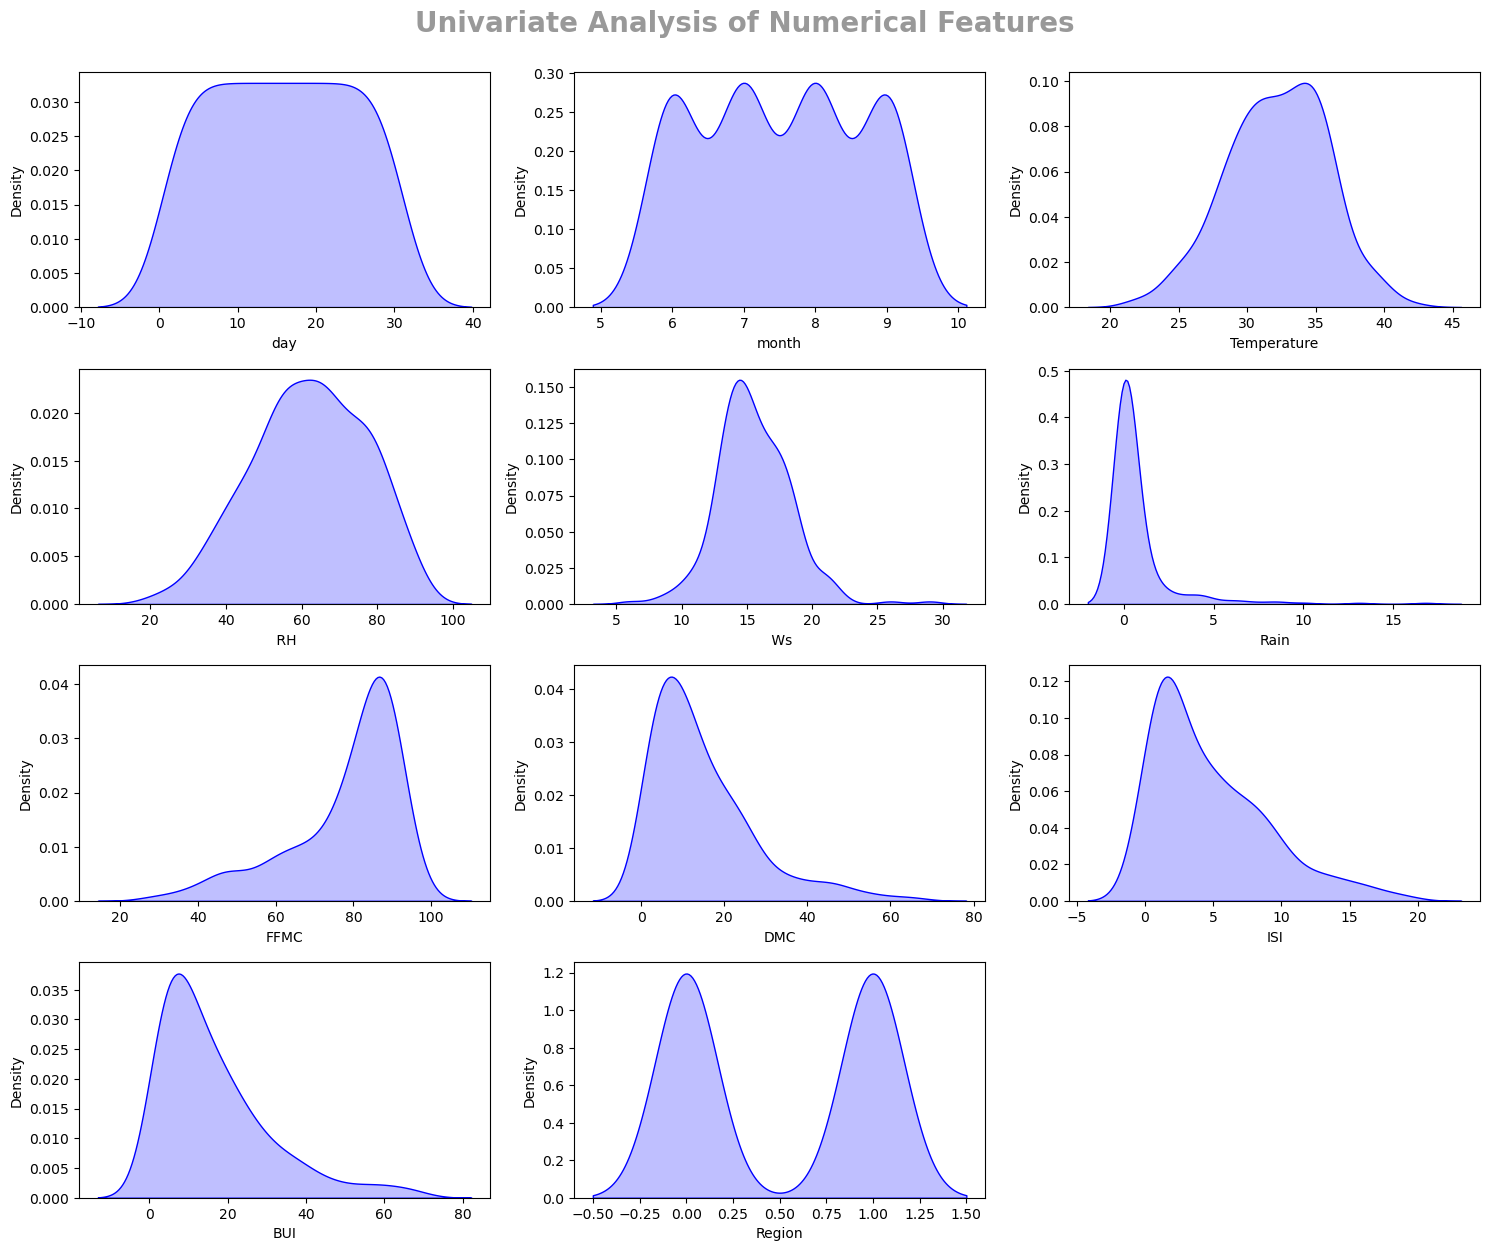

In [74]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.4, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

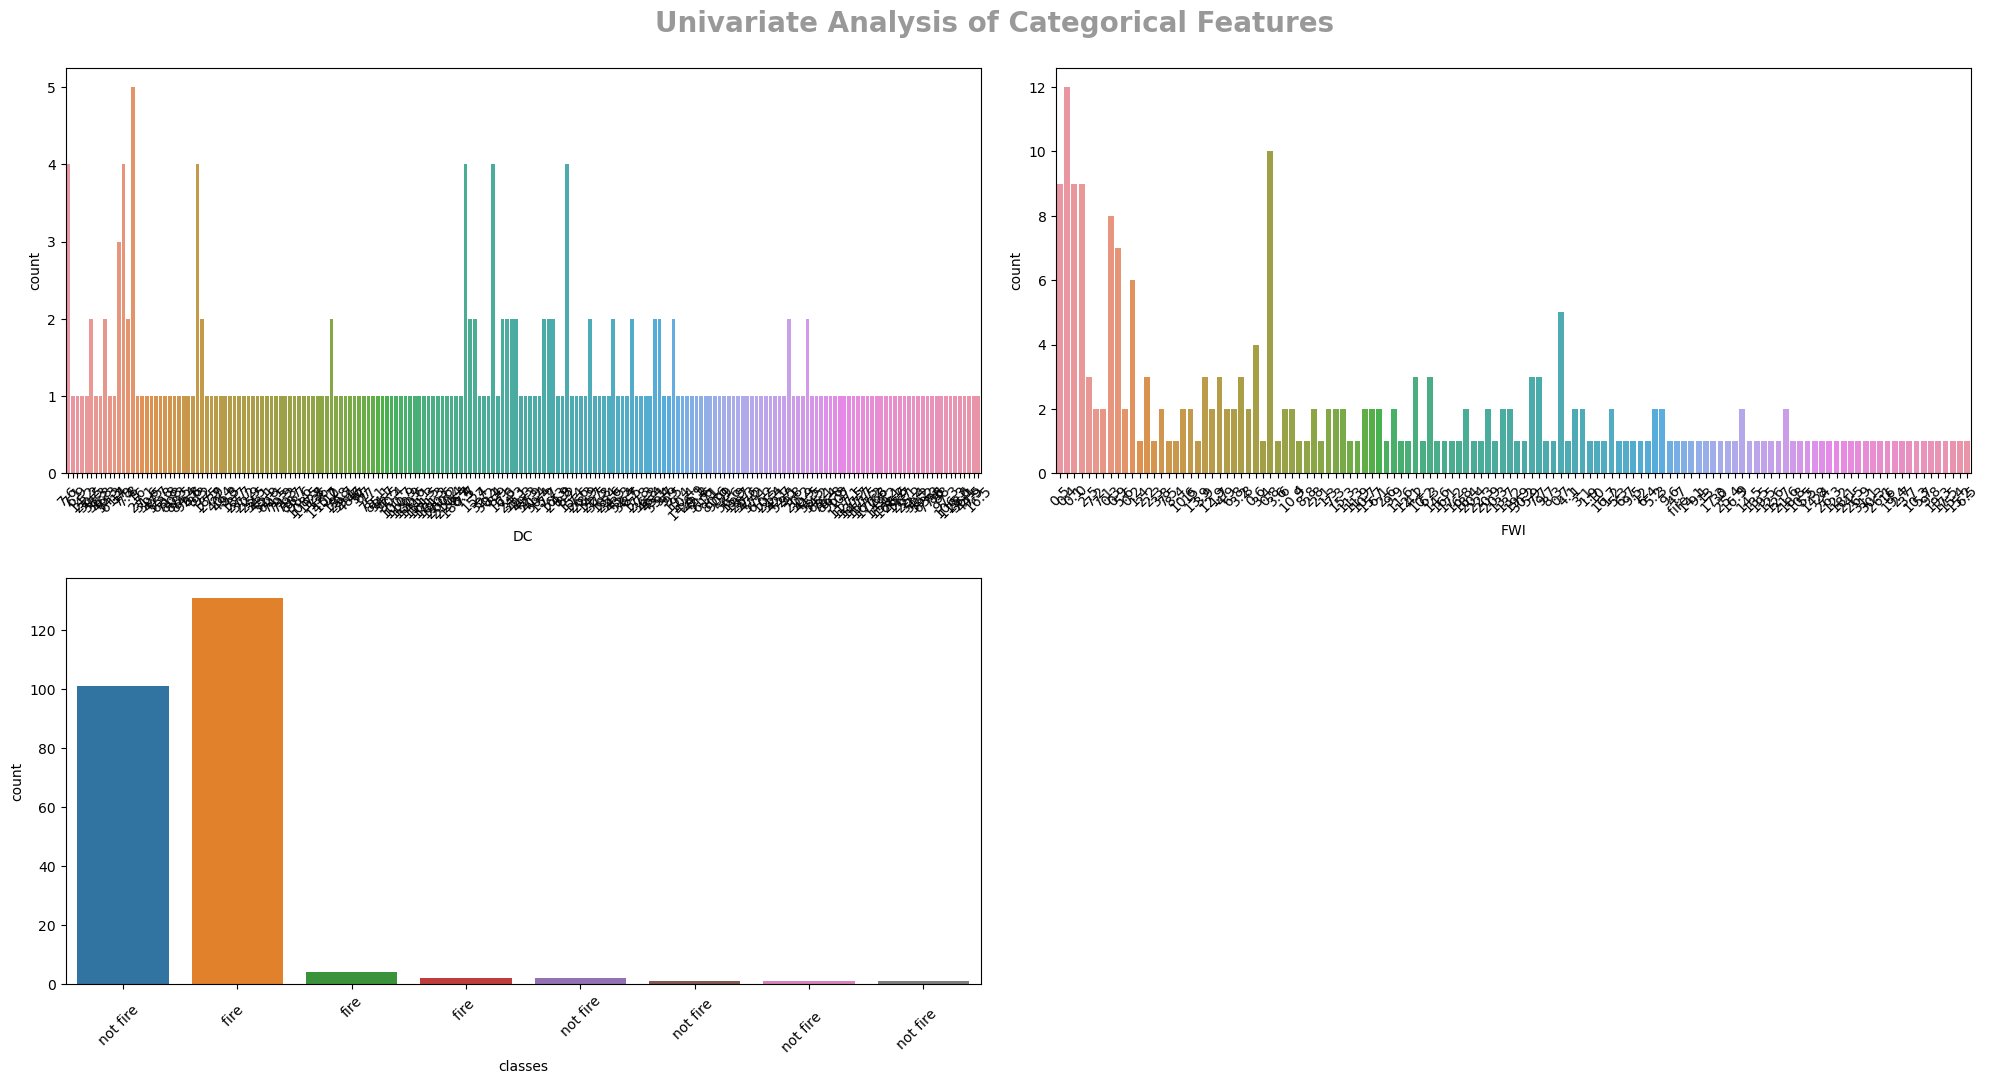

In [76]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.4, y=1.)
cat1 = [ 'DC', 'FWI', 'classes']
for i in range(0, len(cat1)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

# HISTOGRAM

In [ ]:
#A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical 

array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'Temperature'}>],
       [<AxesSubplot:title={'center':' RH'}>,
        <AxesSubplot:title={'center':' Ws'}>,
        <AxesSubplot:title={'center':'Rain'}>],
       [<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'BUI'}>,
        <AxesSubplot:title={'center':'Region'}>, <AxesSubplot:>]],
      dtype=object)

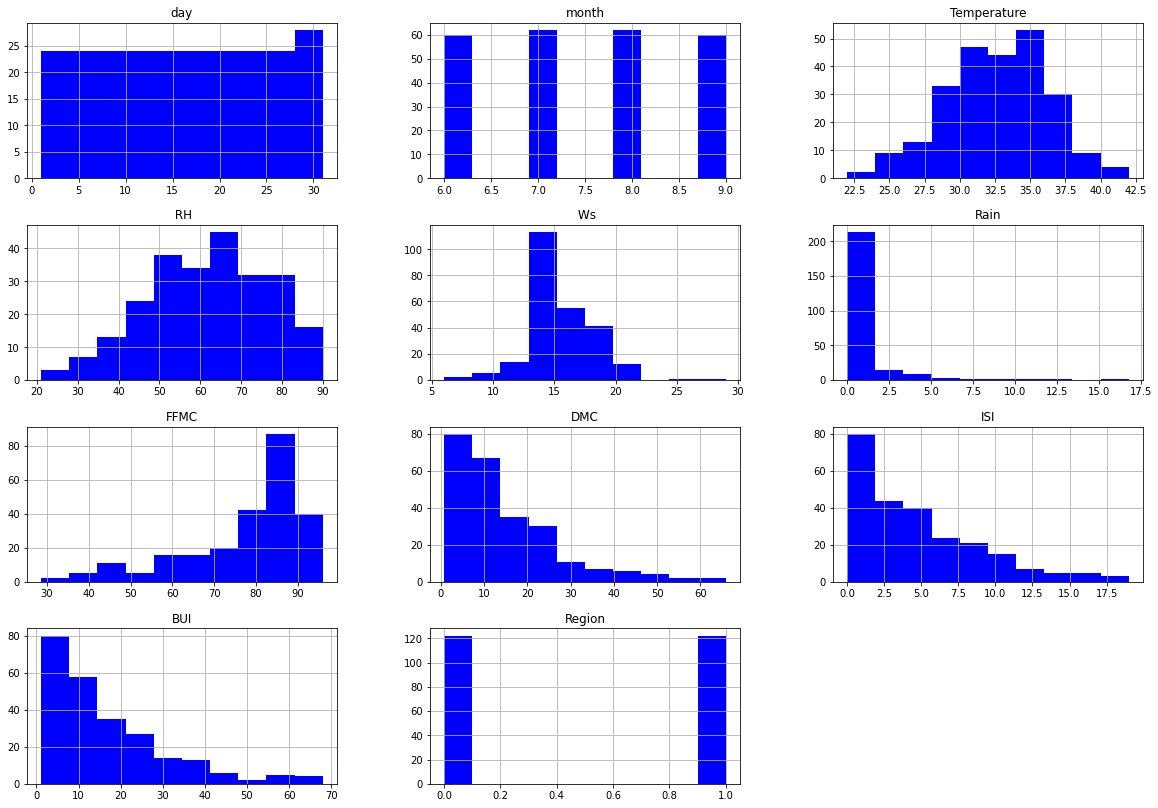

In [19]:
df.hist(figsize = (20,14),color = 'b')

# lineplot

<AxesSubplot:xlabel='Temperature', ylabel='day'>

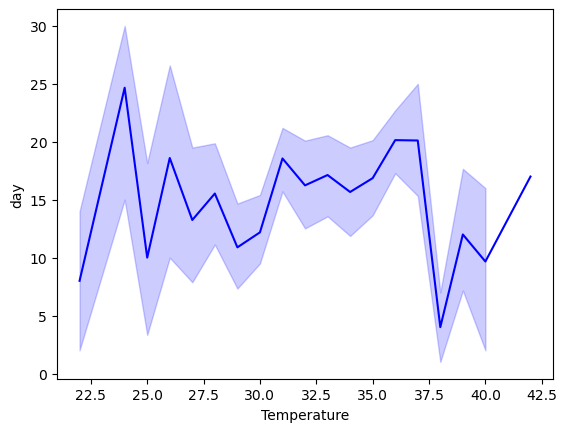

In [86]:
sns.lineplot(x='Temperature',y='day',data=df,color='blue')

# Joinplot

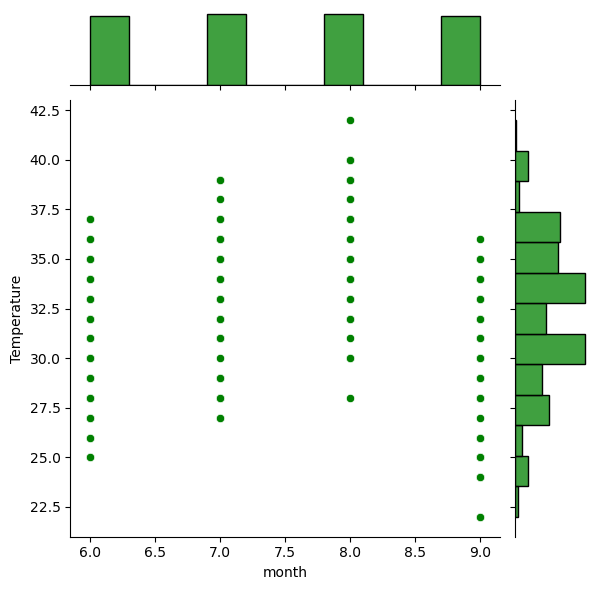

In [61]:
sns.jointplot(x = 'month',y='Temperature',data = df,color = 'g')

# Pairplot

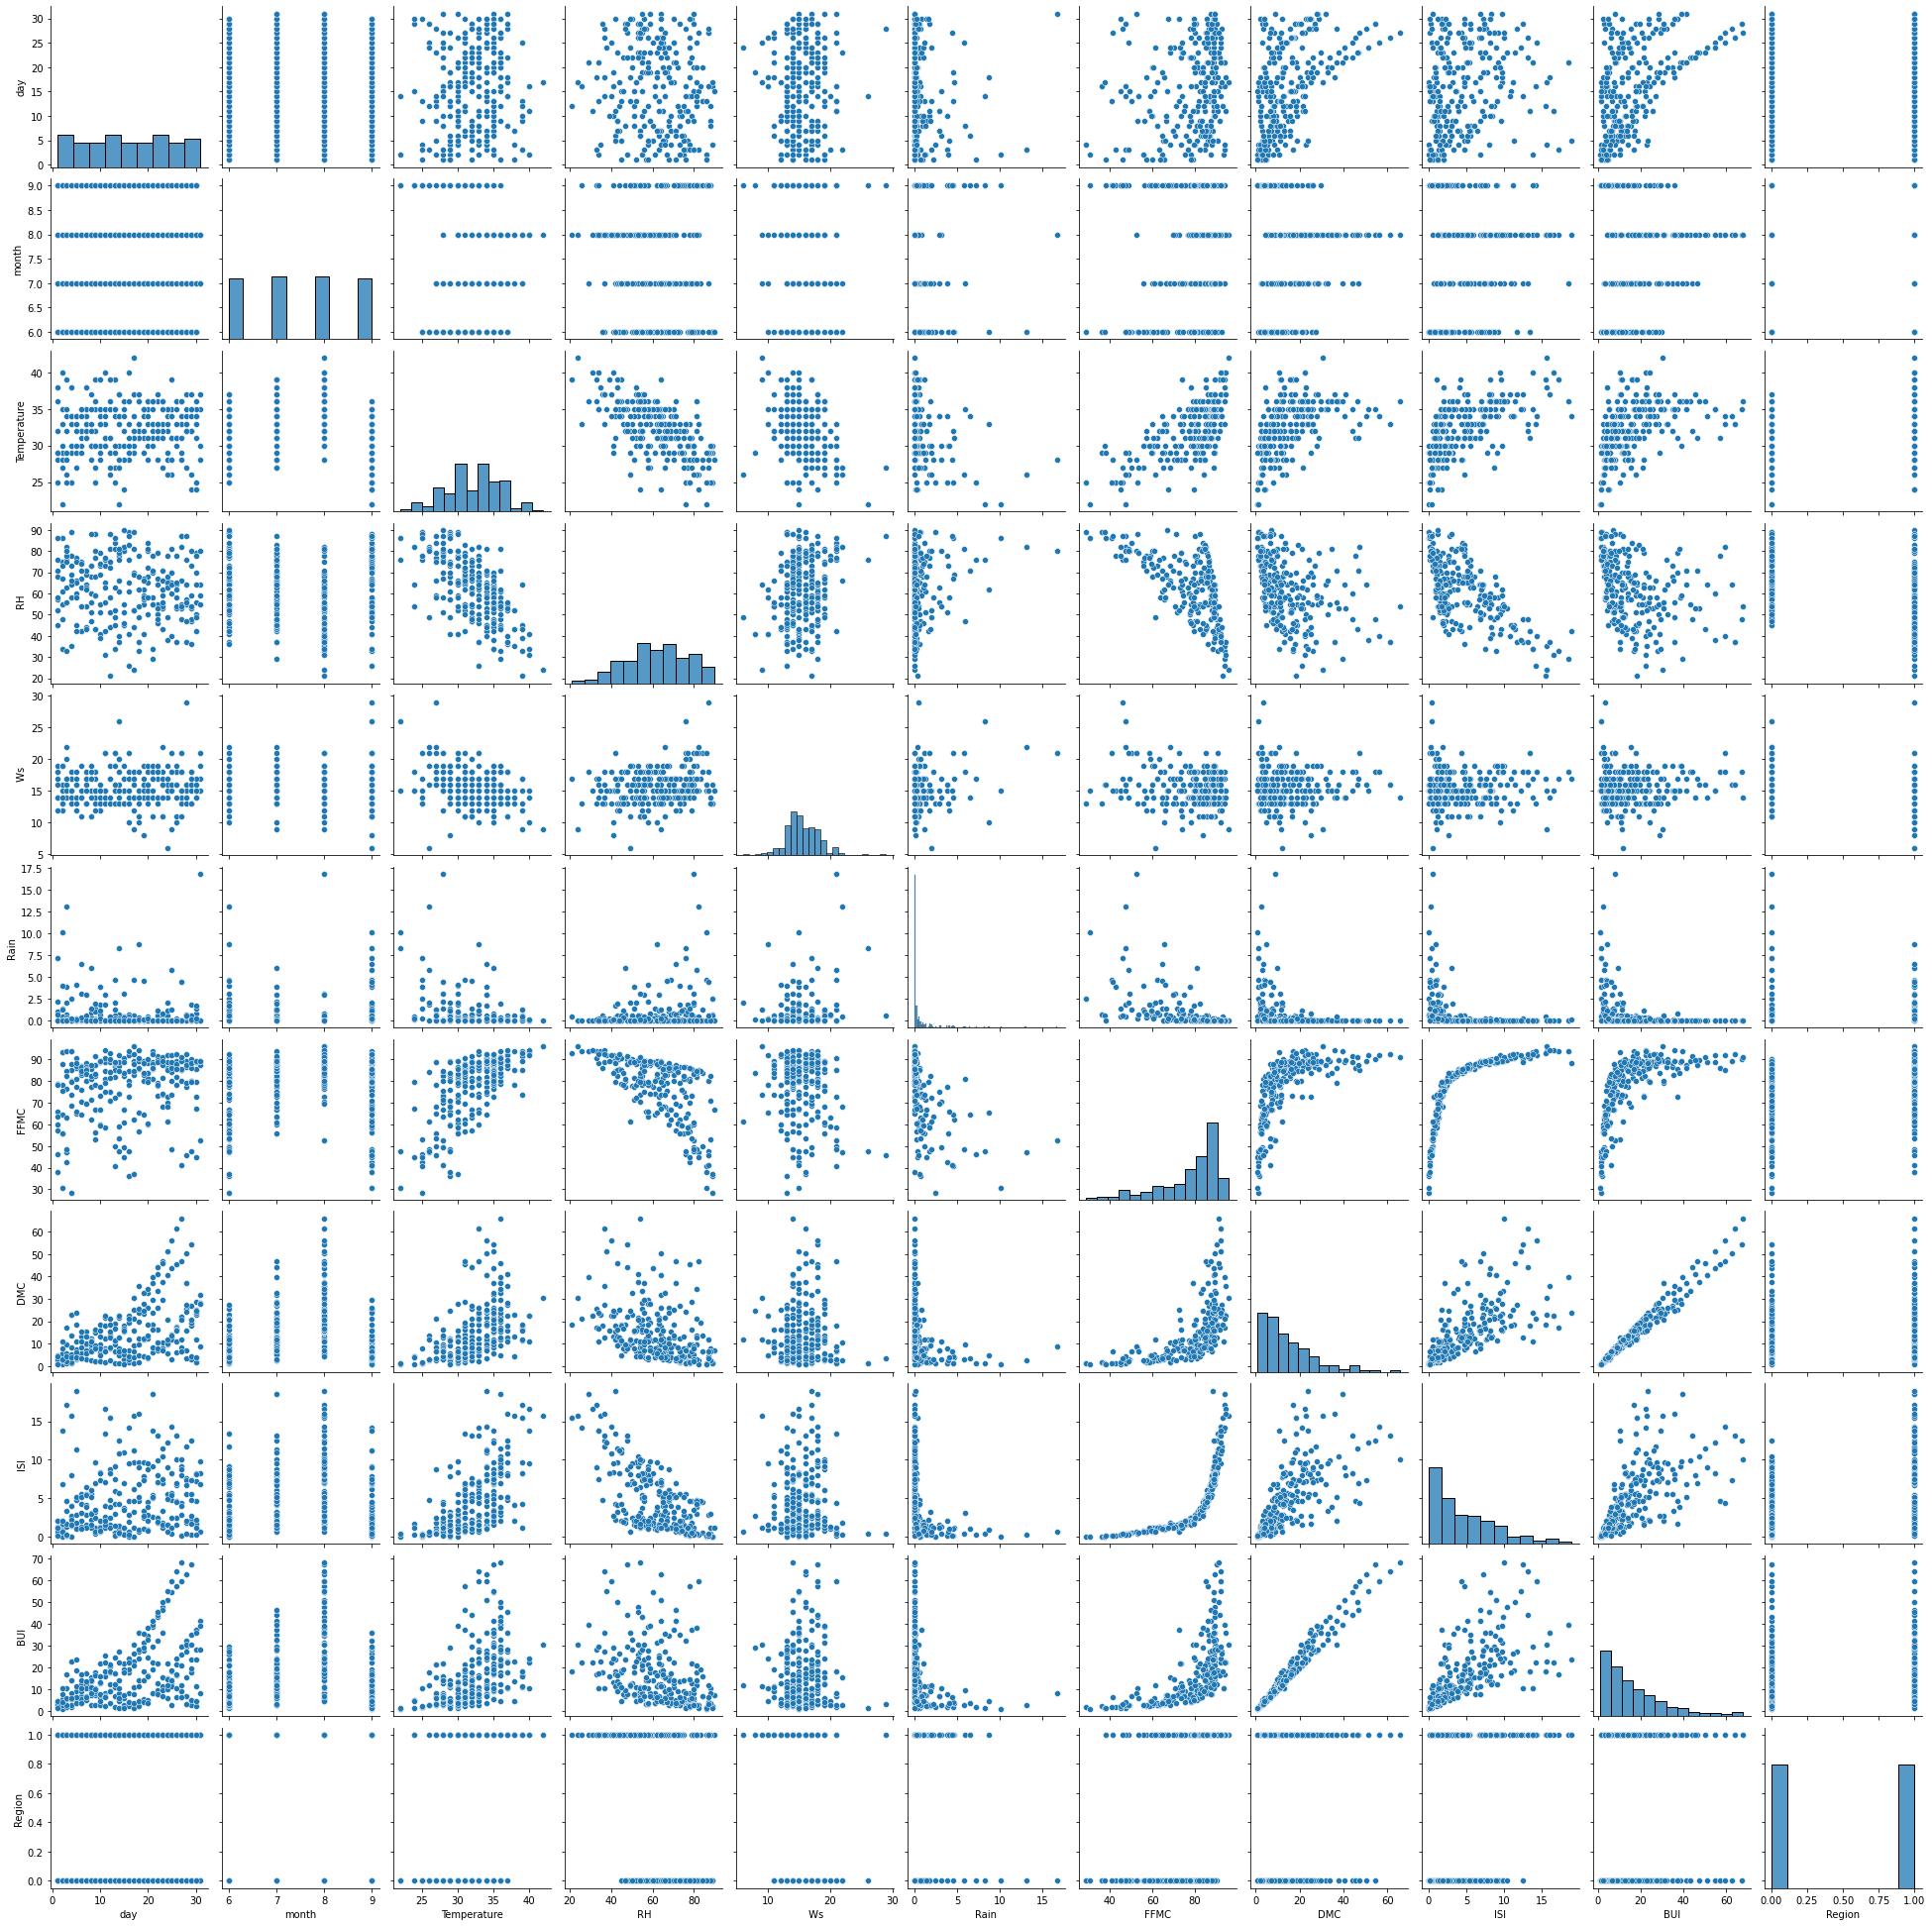

In [29]:
sns.pairplot(df)

# Barplot

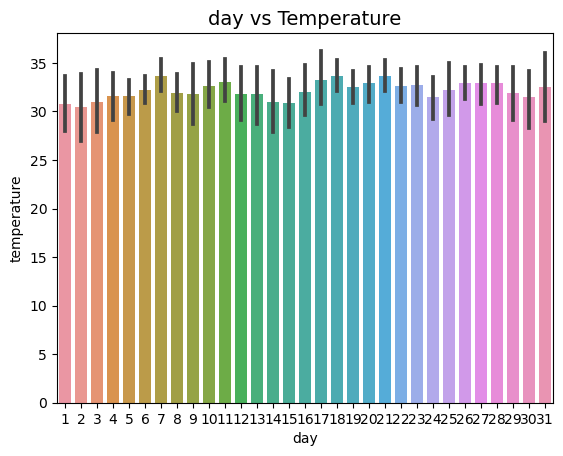

In [91]:
plt.style.use("default")
sns.barplot(x="day",y = "Temperature",data = df)
plt.title("day vs Temperature",fontsize= 14)
plt.xlabel("day")
plt.ylabel("temperature")
plt.show()

In [ ]:
#Questions

In [ ]:
#What is the highest temperature in the dataset

In [37]:
df.Temperature.max()

42

In [ ]:
#What is the lowest temperature in the dataset

In [38]:
df.Temperature.min()

22

In [ ]:
#What did it rain the least


In [39]:
lowest_rain =  df.sort_values(by = 'Rain', ascending = True)[['Rain','day','month']].head(1)

In [40]:
lowest_rain

,Rain,day,month
0,0.0,1,6


#the 6th month with 0.0mm of rainfall

In [ ]:
#When did it rain the most.

In [41]:
highest_rain =df.sort_values(by='Rain',ascending = False,)[['Rain','day','month']].head(1)

In [42]:
highest_rain

,Rain,day,month
91,16.8,31,8


In [ ]:
#what day has the highest temperature in the dataset?

In [50]:
highest_temp= df.sort_values(by='Temperature',ascending=False)[['Temperature','day','month']].head(1)

In [51]:
highest_temp

,Temperature,day,month
199,42,17,8


In [ ]:
#What month is the hottest

In [48]:
highest_month=df.sort_values(by ='Temperature',ascending = False)[['month']].head()

In [49]:
highest_month

,month
199,8
193,8
198,8
184,8
191,8


In [53]:
highest_temp = df.sort_values(by='Temperature', ascending=False)[['Temperature', 'day','month', 'Rain']].head(1)

lowest_temp =  df.sort_values(by='Temperature', ascending=True)[['Temperature', 'day','month', 'Rain']].head(1)

print("Highest Temperatures")
print(highest_temp)


print("Lowest Temperatures")
print(lowest_temp)


Highest Temperatures
     Temperature  day  month  Rain
199           42   17      8   0.0
Lowest Temperatures
     Temperature  day  month  Rain
105           22   14      9   8.3


In [ ]:
# create a list of features  we want

In [56]:
features = ['Temperature','month','day']
x = df[features]
y = df["month"]

In [57]:
x.head()

,Temperature,month,day
0,29,6,1
1,29,6,2
2,26,6,3
3,25,6,4
4,27,6,5


In [58]:
x.describe()

,Temperature,month,day
count,244.000000,244.000000,244.000000
mean,32.172131,7.500000,15.754098
std,3.633843,1.112961,8.825059
min,22.000000,6.000000,1.000000
25%,30.000000,7.000000,8.000000
50%,32.000000,7.500000,16.000000
75%,35.000000,8.000000,23.000000
max,42.000000,9.000000,31.000000
